<a href="https://colab.research.google.com/github/Followb1ind1y/Machine_Learning_Algorithms/blob/main/ML_Algorithms_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Algorithms: Logistic Regression**


### **Logistic Regression Basics**

**Logistic Regression** is one of the most simple and commonly used Machine Learning algorithms for **classification** problem. It is easy to implement and can be used as the baseline for any binary classification problem. Logistic regression describes and estimates the relationship between one dependent binary variable and independent variables. The classification problem is just like the regression problem, except that the values we now want to predict take on only a small number of discrete values. In Logistic Regression the new form uses the **Sigmoid Function**, also called the **Logistic Function**:

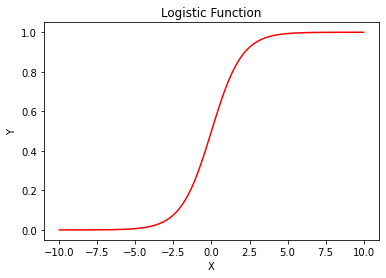

In [51]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100) 
y = 1/(1+np.exp(-x))
plt.plot(x, y, color = 'red') 
plt.title("Logistic Function")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

$$
\begin{align*}
& \mathrm{Activation \ Function}: \sigma(x) = \frac{1}{1+e^{-(x)}} \\
& \mathrm{Model}: z = (\sum^{n}_{i=1}w_{i}x_{i})+ b = W^{T}\cdot x + b⇒ ŷ = \sigma(z) = \frac{1}{1+e^{-(W^{T}\cdot x + b)}}\\
&\mathrm{Loss \ Function}: L_{CE}(y^{̂},y) = \frac{1}{m}\sum_{i=1}^{m}y \log(ŷ) + (1-y) \log(1-ŷ) \\
\end{align*}
$$

$$\begin{align*}  
&\frac{\partial L_{CE}(y^{̂},y)}{\partial W}= \frac{1}{m}\sum_{i=1}^{m}(ŷ-y)x_{i}^{T}\\
&\frac{\partial L_{CE}(y^{̂},y)}{\partial b}= \frac{1}{m}\sum_{i=1}^{m}(ŷ-y) \\
\end{align*}
$$

### **Dataset Initialization**

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [53]:
np.random.seed(0)
x_1, x_2 = np.random.rand(50, 1), np.random.rand(50, 1) + 0.9
y_1, y_2 = 3 + 3 * x_1 + np.random.rand(50, 1), 3 + 3 * x_1 + np.random.rand(50, 1) 
class_1, class_2 = np.concatenate((x_1, y_1), axis=1), np.concatenate((x_2, y_2), axis=1)
zeros, ones = np.zeros((50,1)), np.ones((50,1))
x = np.concatenate((class_1, class_2), axis=0)
y = np.concatenate((zeros, ones), axis=0)

Text(0, 0.5, 'Y')

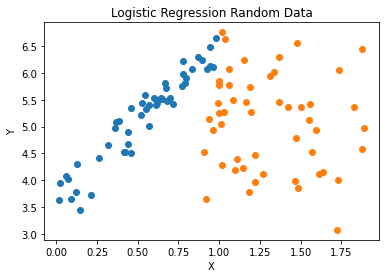

In [54]:
fig, ax = plt.subplots() 
ax.scatter(x_1,y_1) 
ax.scatter(x_2,y_2) 
ax.set_title('Logistic Regression Random Data')
ax.set_xlabel('X') 
ax.set_ylabel('Y')

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

### **Implementing Logistic Regression from scratch**

In [56]:
class LogisticRegressionUsingGD:
    def __init__(self, learning_rate=0.05, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
    
    def Sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def Cross_Entropy(self, y_pred, y):
        return - np.sum(np.dot(y.T,np.log(y_pred))+ np.dot((1-y).T,np.log(1-y_pred))) / y.shape[0]
    
    def get_accuracy(self, y_pred, y):
        return 1- (np.sum(np.abs(y_pred - y)) / y.shape[0])
    
    def fit(self, x, y):
        self.iters, self.losses, self.accuracys = [], [], []
        self.m = x.shape[0]
        self.weights = np.zeros((x.shape[1]+1,1))
        self.new_x = np.concatenate((np.ones((self.m,1)),x), axis=1)

        # initial data
        initial_loss = self.Cross_Entropy(self.Sigmoid(np.dot(self.new_x, self.weights)), y)
        intial_acc = self.get_accuracy(self.predict(x), y)
        self.iters.append(0)
        self.losses.append(initial_loss)
        self.accuracys.append(intial_acc)

        # Train
        for i in range(1,self.n_iterations):
            x_dot_w = np.dot(self.new_x, self.weights)
            y_hat = self.Sigmoid(x_dot_w)
            residuals = y_hat - y 
            gradient_vector = np.dot(self.new_x.T, residuals)
            self.weights -= (self.learning_rate / self.m) * gradient_vector
            loss = self.Cross_Entropy(y_hat, y)
            y_pred = self.predict(x)
            accuracy = self.get_accuracy(y_pred, y)
            self.iters.append(i)
            self.losses.append(loss)
            self.accuracys.append(accuracy)

        self.plot_curve()
        return self
    
    def predict(self, x):
        new_x = np.concatenate((np.ones((x.shape[0],1)),x), axis=1)
        x_dot_w = np.dot(new_x, self.weights)
        y_pred = self.Sigmoid(x_dot_w)
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def plot_curve(self):
        plt.title("Training Curve")
        plt.plot(self.iters, self.losses, label="Train")
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.show()

        print("Final Training Loss: {}".format(self.losses[-1]))

        plt.title("Training Curve")
        plt.plot(self.iters, self.accuracys, label="Train")
        plt.xlabel("Iterations")
        plt.ylabel("Accuracys")
        plt.show()

        print("Final Training Accuracy: {}".format(self.accuracys[-1]))

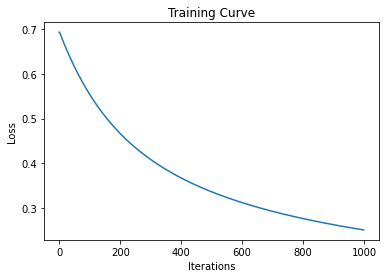

Final Training Loss: 0.2505203971049209


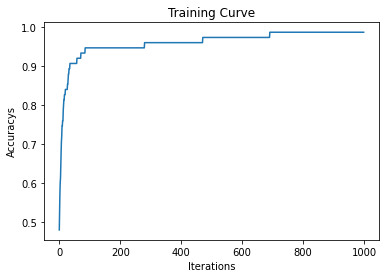

Final Training Accuracy: 0.9866666666666667


In [57]:
# Model initialization
Logistic_Regression_GD = LogisticRegressionUsingGD(learning_rate=0.05, n_iterations=1000)
# Fit the data(train the model)
train_model = Logistic_Regression_GD.fit(x_train, y_train)

In [58]:
y_test_pred = Logistic_Regression_GD.predict(x_test)
test_accuracy = Logistic_Regression_GD.get_accuracy(y_test_pred, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.96


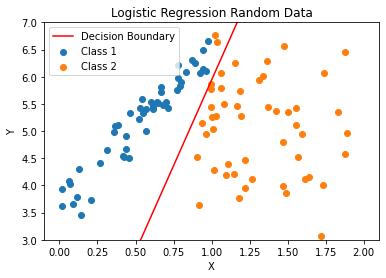

In [59]:
# scatter plot points
fig, ax = plt.subplots() 
ax.scatter(x_1,y_1, label='Class 1') 
ax.scatter(x_2,y_2, label='Class 2') 

# plot the Decision Boundary
weight_0, weight_1, weight_2 = train_model.weights
intercept, slope = -weight_0/weight_2, -weight_1/weight_2
xd = np.array([0, 2])
yd = slope*xd + intercept
plt.plot(xd, yd, color='red', label='Decision Boundary')
ax.set_ylim(3,7)

ax.set_title('Logistic Regression Random Data')
ax.set_xlabel('X') 
ax.set_ylabel('Y')
plt.legend()

### **Implementing Linear Regression from Scikit-learn**

In [60]:
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_pred = logistic_regression.predict(x_test)

In [65]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.96

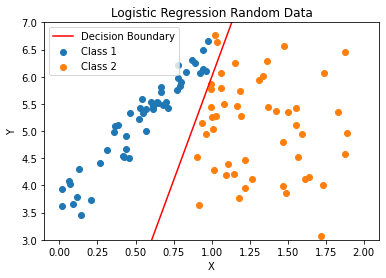

In [63]:
# scatter plot points
fig, ax = plt.subplots() 
ax.scatter(x_1,y_1, label='Class 1') 
ax.scatter(x_2,y_2, label='Class 2') 

# plot the Decision Boundary
beta_1, beta_2 =logistic_regression.coef_.T
beta_0 = logistic_regression.intercept_[0]

# Calculate the intercept and gradient of the decision boundary.
c = -beta_0/beta_2
m = -beta_1/beta_2

xd = np.array([0, 2])
yd = m*xd + c
plt.plot(xd, yd, color='red', label='Decision Boundary')
ax.set_ylim(3,7)

ax.set_title('Logistic Regression Random Data')
ax.set_xlabel('X') 
ax.set_ylabel('Y')
plt.legend()

In [64]:
%%shell
jupyter nbconvert --to html ML_Algorithms_Logistic_Regression.ipynb

[NbConvertApp] Converting notebook ML_Algorithms_Logistic_Regression.ipynb to html
[NbConvertApp] Writing 421191 bytes to ML_Algorithms_Logistic_Regression.html
